In [17]:
import mat73
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [18]:
data_dict_female = mat73.loadmat("./data/Emotrans1_girl_data_preprocessed.mat", use_attrdict=True)
arr = np.array(data_dict_female["All_Feature"])

In [19]:
#retrive pos or neg return np 
def get_pos_or_neg(data,position):
    arr = []
    index = 0
    for i in range(data.shape[0]):
        temp = []
        for j in position:
            for k in data[i][j[0]][j[1]]:
                temp.append(k)
        arr.append(temp)
    return np.array(arr)

In [20]:
# select frequenceis and (0-4s -> 0 or 0.5-4.5s -> 1)
def get_selected(data=None,freq = None, sec=None):
    if freq:
        data = np.delete(data,freq,axis=3)
    if sec == 0:
        return np.delete(data, 0, axis=4)
    elif sec == 1:
        return np.delete(data,1,axis=4)
    else:
        print('sec not specified')
        return data 

In [21]:
pos = [[0,0],[0,1],[1,2],[1,3],[2,0],[2,1],[2,2],[2,3]]
neg = [[0,2],[0,3],[1,0],[1,1],[3,0],[3,1],[3,2],[3,3]]

pos_df_f = get_pos_or_neg(arr,pos)
neg_df_f = get_pos_or_neg(arr,neg)
pos_df_f.shape

pos_df_f=get_selected(pos_df_f,sec=0).reshape(15,96,128,8)
neg_df_f = get_selected(neg_df_f,sec=0).reshape(15,96,128,8)



In [22]:
raw_data = np.concatenate((pos_df_f,neg_df_f),axis=1).reshape(15,192,128*8)
y = np.concatenate((np.ones((15,96)),np.zeros((15,96))),axis=1)

In [25]:
iter = 0
alphas = [0.01,0.001]
coefs = []
for a in alphas:
    # ,max_iter=int(1e6)
    model = LogisticRegression(C=a, penalty='l1',max_iter=500,solver='saga')
    iter = 0
    train_scores=[]
    test_scores = []
    for i in range(14):
        display(iter)
        iter+=1
        x_train,x_test = np.concatenate((raw_data[:i],raw_data[i+1:])).reshape(14*192,1024),raw_data[i].reshape(192,1024)
        y_train,y_test = np.concatenate((y[:i],y[i+1:])).reshape(14*192),y[i].reshape(192)
        x_train,y_train = shuffle(x_train,y_train)
        model.fit(x_train, y_train)
        # training loss
        pred_train_lasso= model.predict(x_train)
        temp = accuracy_score(y_train,pred_train_lasso)
        display("training accuracy: ",temp)
        train_scores.append(temp)

        #testing 
        pred_test_lasso= model.predict(x_test)
        temp = accuracy_score(y_test,pred_test_lasso)
        display("testing accuracy: ",temp)
        test_scores.append(temp)
        
        coefs = model.coef_
    with open('girl_with_acc'+str(a)+".txt",'w') as f:
        f.write("accuracy - training")
        f.write(str(train_scores))
        f.write("\n accuracy - testing")
        f.write(str(test_scores))

        f.write("\ncoefs ")
        for c in coefs[0]:
            f.write(str(c)+",")
    print(train_scores)
    print(test_scores)
    print(coefs)
#     plt.scatter(train_scores,range(test_scores))
#     plt.show()

0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5963541666666666

'testing accuracy: '

0.53125

1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5956101190476191

'testing accuracy: '

0.59375

2

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5885416666666666

'testing accuracy: '

0.515625

3

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5881696428571429

'testing accuracy: '

0.6302083333333334

4

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5970982142857143

'testing accuracy: '

0.609375

5

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5985863095238095

'testing accuracy: '

0.5052083333333334

6

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5956101190476191

'testing accuracy: '

0.5260416666666666

7

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5922619047619048

'testing accuracy: '

0.5208333333333334

8

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5944940476190477

'testing accuracy: '

0.5572916666666666

9

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5974702380952381

'testing accuracy: '

0.5208333333333334

10

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5907738095238095

'testing accuracy: '

0.5208333333333334

11

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6019345238095238

'testing accuracy: '

0.5260416666666666

12

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6019345238095238

'testing accuracy: '

0.515625

13

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5978422619047619

'testing accuracy: '

0.515625

[0.5963541666666666, 0.5956101190476191, 0.5885416666666666, 0.5881696428571429, 0.5970982142857143, 0.5985863095238095, 0.5956101190476191, 0.5922619047619048, 0.5944940476190477, 0.5974702380952381, 0.5907738095238095, 0.6019345238095238, 0.6019345238095238, 0.5978422619047619]
[0.53125, 0.59375, 0.515625, 0.6302083333333334, 0.609375, 0.5052083333333334, 0.5260416666666666, 0.5208333333333334, 0.5572916666666666, 0.5208333333333334, 0.5208333333333334, 0.5260416666666666, 0.515625, 0.515625]
[[0. 0. 0. ... 0. 0. 0.]]


0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5

'testing accuracy: '

0.5

1

'training accuracy: '

0.5

'testing accuracy: '

0.5

2

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5

'testing accuracy: '

0.5

3

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5

'testing accuracy: '

0.5

4

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5

'testing accuracy: '

0.5

5

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5

'testing accuracy: '

0.5

6

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5

'testing accuracy: '

0.5

7

'training accuracy: '

0.5

'testing accuracy: '

0.5

8

'training accuracy: '

0.5

'testing accuracy: '

0.5

9

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5

'testing accuracy: '

0.5

10

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5

'testing accuracy: '

0.5

11

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5

'testing accuracy: '

0.5

12

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5

'testing accuracy: '

0.5

13

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5

'testing accuracy: '

0.5

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[[0. 0. 0. ... 0. 0. 0.]]


In [13]:
temp =[0.61474609375, 0.6150716145833334, 0.6170247395833334, 0.61376953125, 0.6170247395833334, 0.6181640625, 0.6139322916666666, 0.6153971354166666, 0.6173502604166666, 0.6140950520833334, 0.6139322916666666, 0.61376953125, 0.61572265625, 0.6150716145833334, 0.6111653645833334, 0.6121419270833334, 0.6158854166666666, 0.6092122395833334, 0.6129557291666666, 0.61279296875, 0.6145833333333334, 0.6103515625, 0.6142578125, 0.6153971354166666, 0.6110026041666666, 0.61279296875, 0.6140950520833334, 0.61474609375, 0.6140950520833334, 0.6136067708333334, 0.6126302083333334, 0.6145833333333334]
sum(temp)/len(temp)

0.6141052246093749

In [14]:
temp =[0.61474609375, 0.6150716145833334, 0.6170247395833334, 0.61376953125, 0.6170247395833334, 0.6181640625, 0.6139322916666666, 0.6153971354166666, 0.6173502604166666, 0.6140950520833334, 0.6139322916666666, 0.61376953125, 0.61572265625, 0.6150716145833334, 0.6111653645833334, 0.6121419270833334, 0.6158854166666666, 0.6092122395833334, 0.6129557291666666, 0.61279296875, 0.6145833333333334, 0.6103515625, 0.6142578125, 0.6153971354166666, 0.6110026041666666, 0.61279296875, 0.6140950520833334, 0.61474609375, 0.6140950520833334, 0.6136067708333334, 0.6126302083333334, 0.6145833333333334]
sum(temp)/len(temp)

0.6141052246093749

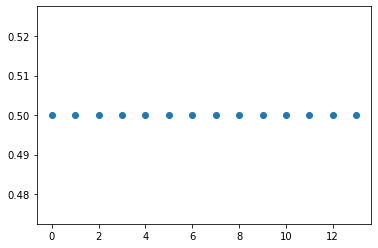

In [22]:
import matplotlib.pyplot as plt
acc = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
plt.scatter(range(len(acc)),acc)
plt.savefig("acc_train001.png")

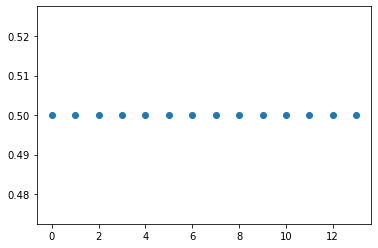

In [23]:
acc = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
plt.scatter(range(len(acc)),acc)
plt.savefig("acc_test001.png")

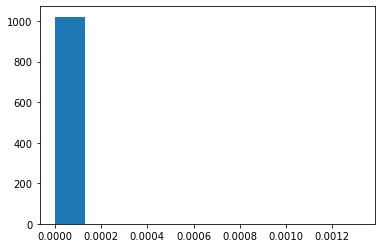

In [24]:
import matplotlib.pyplot as plt
coefs =[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00044533141936079656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00017778714691155115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0013173972598060314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
plt.hist(coefs)
plt.savefig("coefs_girl01.png")